In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

The mnist dataset is a 28x28 array of greyscale (0-255) with number labels for each item. 

## *NEURAL NETWORKS WORK BETTER WITH NORMALISED DATA*

In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

item: 9


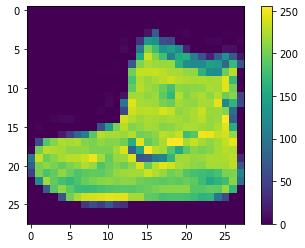

In [27]:
plt.imshow(train_images[0])
plt.colorbar()
print("item:",train_labels[0])

In [28]:
train_images = train_images / 255.0
test_images = test_images / 255.0

item: 9


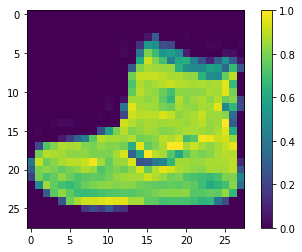

In [29]:
plt.imshow(train_images[0])
plt.colorbar()
print("item:",train_labels[0])

the flatten layer takes the matrix and returns a 1D array. There are 10 items to pick from so our NN will have 10 layers at the end.

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

- **Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

- **Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0]

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics="accuracy")

In [43]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5009 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3760 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3143 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2960 - accuracy: 0.8901


This shows us that the model was about 66% accurate which is worse than the train as expected but still ok for a test. 

In [36]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1000us/step - loss: 0.3438


0.3438464403152466

The code below now uses the model to predict images it has never seen. It outputs a probability for each of the lables. We can see that for the first image in the test set, the most likely classification is a shoe (number 9)

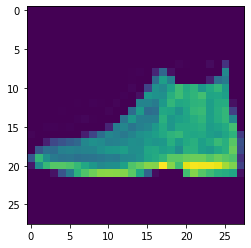

In [40]:
plt.imshow(test_images[0])

In [41]:
classifications = model.predict(test_images)
for item, prob in enumerate(classifications[0]):
    print("item", item, "likelihood:", prob)
print("label: ",test_labels[0])

item 0 likelihood: 1.4338722e-08
item 1 likelihood: 1.14008504e-10
item 2 likelihood: 2.9262137e-09
item 3 likelihood: 2.4051124e-11
item 4 likelihood: 1.5350583e-08
item 5 likelihood: 0.0002903948
item 6 likelihood: 8.917731e-09
item 7 likelihood: 0.016891643
item 8 likelihood: 1.6489862e-08
item 9 likelihood: 0.9828179
label:  9


Playing around with the parameters of the model, the evaluation of the test data resulted in the following:
- epochs: 
    - 10: accuracy 88%, loss 0.3 , slower
    - 30: accuracy 97%, loss 0.13, MUCH slower (fml)
- hidden layers: 
    - 1024: accuracy 97%, loss 0.08, slower
    - 512:  accuracy 97%, loss 0.08, slower
- Normalisation:
    - without normalisation: accuracy 93%, loss 0.46, same time frame

In [45]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1971 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1915 - accuracy: 0.9283
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1868 - accuracy: 0.9301
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1808 - accuracy: 0.9320
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1782 - accuracy: 0.9338
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1712 - accuracy: 0.9357
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1688 - accuracy: 0.9376
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1638 - accuracy: 0.9384
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1587 - accuracy: 0.9406
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.156

In [46]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
# correct classification

313/313 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8839
[1.5156952e-15 5.7779690e-20 5.9144428e-14 3.4599542e-17 1.9651025e-15
 1.2794429e-05 6.0467538e-16 3.4606637e-04 6.1694479e-17 9.9964118e-01]
9


# input and output shapes
if you remove the Flatten() layer you get an error about the shape of the data. Because **the first layer in your network should be the same shape as your data.** Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

The same goes for the output layer. The output layer will give the probability for each outcome. Therefore if we have 10 outcomes, we MUST have 10 nodes in the output layer. 

You can, however, add more layers in between but because the data is quite simple it will have little/no effect on the outcome and will only slow down the process. If you had colours, adding more layers would have had significant results. 

# Callback

create a callback class to stop training the model when you reach a certain accuracy

In [ ]:
class AccuracyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9): 
      print("\nReached 90% accuracy. Cancelling training!")
      self.model.stop_training = True

class LossCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') >= 0.9): 
      print("\nLoss fell below threashold. Cancelling training!")
      self.model.stop_training = True

accuracycallbacks = AccuracyCallback()
model.fit(train_images, train_labels, epochs=5, callbacks=[accuracycallbacks])